# Problem 3 (5 points)

In [7]:
import numpy as np
import matplotlib.pyplot as plt


def plot_data(data, c, title="", xlabel="$x_1$",ylabel="$x_2$",classes=["",""],alpha=1):
    N = len(c)
    colors = ['royalblue','crimson']
    symbols = ['o','s']
    
    plt.figure(figsize=(5,5),dpi=120)

    for i in range(2):
        x = data[:,0][c==i]
        y = data[:,1][c==i]

        plt.scatter(x,y,color=colors[i],marker=symbols[i],edgecolor="black",linewidths=0.4,label=classes[i],alpha=alpha)

    plt.legend(loc="upper right")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    ax = plt.gca()
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.xlim([-0.05,1.05])
    plt.ylim([-0.05,1.05])
    plt.title(title)

def plot_contour(predict, mapXY = None):
    res = 500
    vals = np.linspace(-0.05,1.05,res)
    x,y = np.meshgrid(vals,vals)
    XY = np.concatenate((x.reshape(-1,1),y.reshape(-1,1)),axis=1)
    if mapXY is not None:
        XY = mapXY(XY)
    contour = predict(XY).reshape(res, res)
    plt.contour(x, y, contour)


## Generate Dataset
#### (Don't edit this code.)

In [8]:
def sample_ring(N,x,y,ro,ri):
    theta = np.random.rand(N)*2*np.pi
    r = np.random.rand(N)
    r = np.sqrt(r*(ro**2-ri**2)+ri**2)
    xs = x + r * np.cos(theta)
    ys = y + r * np.sin(theta)
    return xs, ys

def get_ring_dataset():
    np.random.seed(0)
    c0 = sample_ring(70,0.5,0.5,0.5,0.3)
    c1 = sample_ring(60,0.45,0.47,0.36,0.15)
    xs = np.concatenate([c0[0],c1[0]],0)
    ys = np.concatenate([c0[1],c1[1]],0)
    c = np.concatenate([np.zeros(70),np.ones(60)],0)
    return np.vstack([xs,ys]).T, c

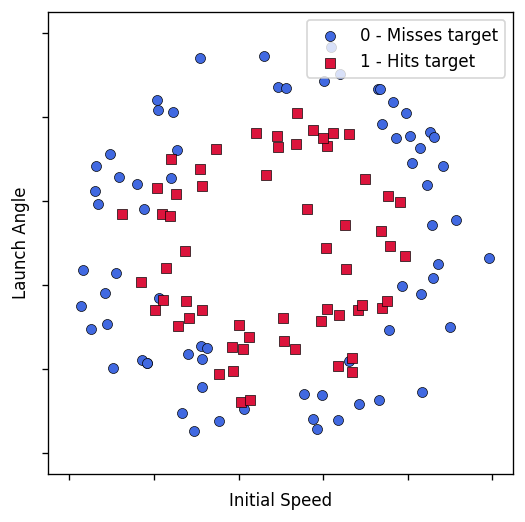

In [9]:
data, classes = get_ring_dataset()
format = dict(xlabel="Initial Speed",ylabel="Launch Angle", classes=["0 - Misses target", "1 - Hits target"])

plot_data(data, classes, **format)

## Feature Expansion

Define a function to expand 2 features into more features
For the features $x_1$ and $x_2$, expand into:
- $1$
- $x_1$
- $x_2$
- $x_1^2$
- $x_2^2$
- $\sin(x_1)$
- $\cos(x_1)$
- $\sin(x_2)$
- $\cos(x_2)$
- $\sin^2(x_1)$
- $\cos^2(x_1)$
- $\sin^2(x_2)$
- $\cos^2(x_2)$
- $\exp(x_1)$
- $\exp(x_2)$


In [10]:
def feature_expand(x):
    x1 = x[:,0].reshape(-1, 1)
    x2 = x[:,1].reshape(-1, 1)

    # YOUR CODE GOES HERE:
    columns = [np.ones_like(x1), x1, x2, x1**2, x2**2, 
                np.sin(x1), np.cos(x1), np.sin(x2), np.cos(x2), 
                np.sin(x1)**2, np.cos(x1)**2, np.sin(x2)**2, np.cos(x2)**2,
                np.exp(x1), np.exp(x2)] # Add all expanded features to this list

    X = np.concatenate(columns, axis=1)
    return X

features = feature_expand(data)
print("Dataset size:", np.shape(data))
print("Expanded dataset size:", np.shape(features))


Dataset size: (130, 2)
Expanded dataset size: (130, 15)


## Logistic Regression
Use SciKit-Learn's Logistic Regression model to learn the decision boundary for this data, using regularization. (The `C` argument controls regularization strength.)

Train this model on your expanded feature set.


Details about how to use this are here:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Notes:
- $\lambda$ is related to sklearn's regularization strength $C$ by: $\lambda = 1/C$
- You may want to increase the maximum number of iterations


In [11]:
from sklearn.linear_model import LogisticRegression

def get_logistic_regressor(features, classes, L = 1):
    # YOUR CODE GOES HERE
    # - Instantiate model with regularization
    # - Fit model to expanded data
    model = LogisticRegression(C=1/L, max_iter=10000)
    model.fit(features, classes)
    

    return model

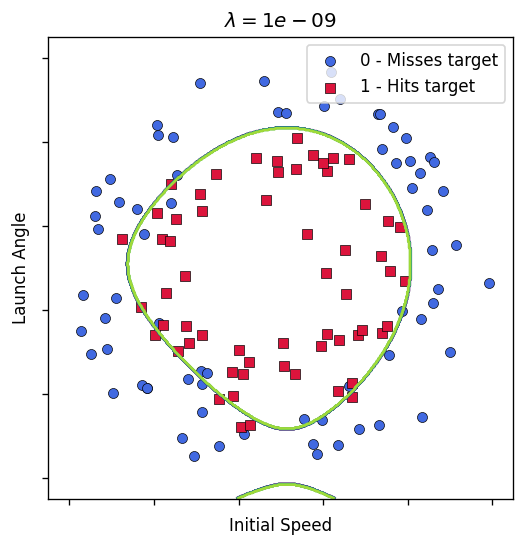

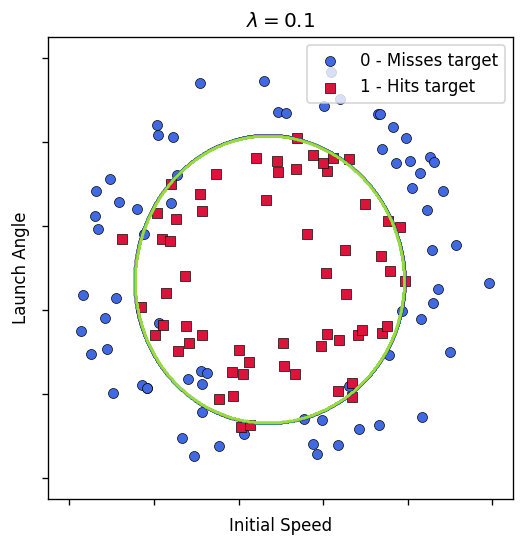

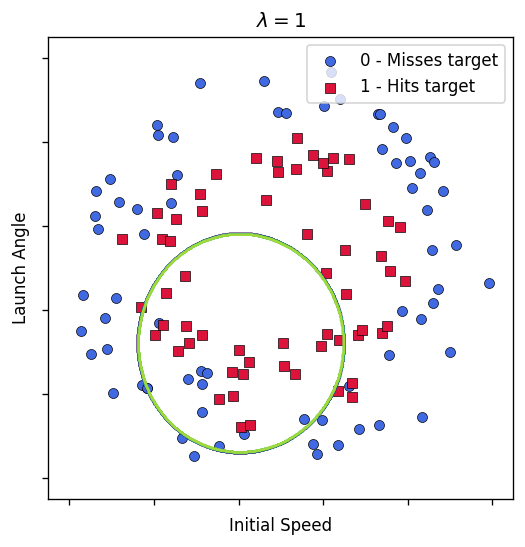

In [12]:
for L in [1e-9, 1e-1, 1]:
    model = get_logistic_regressor(features, classes, L)
    plot_data(data, classes, **format, title=f"$\lambda={L}$")
    plot_contour(model.predict, feature_expand)
    plt.show()

As $\lambda$ increases, note what happens to the decision boundary. Why does this occur?

Lambda smooths out the fitted boundary. This results in not over fitting but if taken too far, as with lambda = 1, the boundary doesn't fit the data well at all.